## Distances and Angles between Images

We are going to compute distances and angles between images.

## Learning objectives
By the end of this notebook, you will learn to 

1. Write programs to compute distance.
2. Write programs to compute angle.

"distance" and "angle" are useful beyond their usual interpretation. They are useful for describing __similarity__ between objects. You will
first use the functions you wrote to compare MNIST digits. Furthermore, we will use these concepts for implementing the K Nearest Neighbors algorithm, which is a useful algorithm for classifying object according to distance.

In [1]:
# PACKAGE: DO NOT EDIT THIS LINE
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

import sklearn
from ipywidgets import interact
from load_data import load_mnist

The next cell loads the MNIST digits dataset.

In [2]:
MNIST = load_mnist()
images = MNIST['data'].astype(np.double)
labels = MNIST['target'].astype(np.int)

In [3]:
# Plot figures so that they can be shown in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

For this assignment, you need to implement the two functions (`distance` and `angle`) in the cell below which compute the distance and angle between two vectors.

In [82]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def distance(x0, x1):
    """Compute distance between two vectors x0, x1 using the dot product"""
    distance = np.sqrt(np.dot((x0-x1),(x0-x1)))
    return distance

def angle(x0, x1):
    """Compute the angle between two vectors x0, x1 using the dot product"""
    x0_norm = x0 / np.linalg.norm(x0)
    x1_norm = x1 / np.linalg.norm(x1)
    angle = np.arccos(np.clip(np.dot((x0_norm, x1_norm)), -1, 1))
    return angle


We have created some helper functions for you to visualize vectors in the cells below. You do not need to modify them.

In [83]:
def plot_vector(v, w):
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

In [85]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1,0])
b = np.array([0,1])
print(distance(a,b))
print(a)
print(b)
print((angle(a,b) / (np.pi * 2) * 360.) == 90)
np.testing.assert_almost_equal(distance(a, b), np.sqrt(2))
assert((angle(a, b) / (np.pi * 2) * 360.) == 90)

1.41421356237
[1 0]
[0 1]


TypeError: Required argument 'b' (pos 2) not found

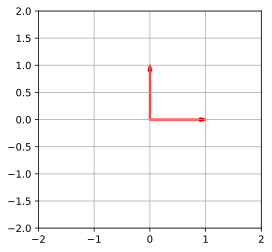

In [86]:
plot_vector(b, a)

The next cell shows some digits from the dataset.

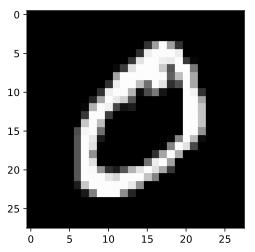

In [30]:
plt.imshow(images[labels==0].reshape(-1, 28, 28)[0], cmap='gray');

But we have the following questions:

1. What does it mean for two digits in the MNIST dataset to be _different_ by our distance function? 
2. Furthermore, how are different classes of digits different for MNIST digits? Let's find out!

For the first question, we can see just how the distance between digits compare among all distances for 
the first 500 digits. The next cell computes pairwise distances between images.

In [31]:
distances = []
for i in range(len(images[:500])):
    for j in range(len(images[:500])):
        distances.append(distance(images[i], images[j]))

In [65]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f.ravel(), s.ravel())
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 46000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()
    
    
    print(np.argmin(scipy.spatial.distance.cdist(f, s), axis=0))

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

In [66]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def most_similar_image():
    """Find the index of the digit, among all MNIST digits
       that is the second-closest to the first image in the dataset (the first image is closest to itself trivially). 
       Your answer should be a single integer.
    """
    index = 4 #<-- Change the -1 to the index of the most similar image.
    # You should do your computation outside this function and update this number
    # once you have computed the result
    return index

In [67]:
result = most_similar_image()

For the second question, we can compute a `mean` image for each class of image, i.e. we compute mean image for digits of `1`, `2`, `3`,..., `9`, then we compute pairwise distance between them. We can organize the pairwise distances in a 2D plot, which would allow us to visualize the dissimilarity between images of different classes.

First we compute the mean for digits of each class.

In [68]:
means = {}
for n in np.unique(labels):
    means[n] = np.mean(images[labels==n], axis=0)

For each pair of classes, we compute the pairwise distance and 
store them into MD (mean distances). We store the angles between the mean digits in AG

In [69]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        AG[i, j] = angle(means[i].ravel(), means[j].ravel())

TypeError: Required argument 'b' (pos 2) not found

Now we can visualize the distances! Here we put the pairwise distances. The colorbar
shows how the distances map to color intensity.

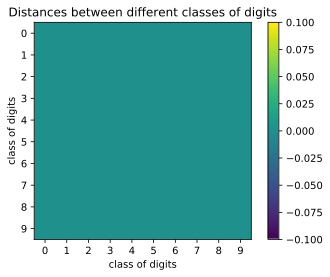

In [70]:
fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

Similarly for the angles.

In [ ]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();

## K Nearest Neighbors

In this section, we will explore the [KNN classification algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
A classification algorithm takes input some data and use the data to 
determine which class (category) this piece of data belongs to.

![flower](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

As a motivating example, consider the [iris flower dataset](https://archive.ics.uci.edu/ml/datasets/iris). The dataset consists
of 150 data points where each data point is a feature vector $\boldsymbol x \in \mathbb{R}^4$ describing the attribute of a flower in the dataset, the four dimensions represent 

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 


and the corresponding target $y \in \mathbb{Z}$ describes the class of the flower. It uses the integers $0$, $1$ and $2$ to represent the 3 classes of flowers in this dataset.

0. Iris Setosa
1. Iris Versicolour 
2. Iris Virginica


In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
print('data shape is {}'.format(iris.data.shape))
print('class shape is {}'.format(iris.target.shape))

For the simplicity of the exercise, we will only use the first 2 dimensions (sepal length and sepal width) of as features used to classify the flowers.


In [ ]:
X = iris.data[:, :2] # use first two version for simplicity
y = iris.target

We create a scatter plot of the dataset below. The x and y axis represent the sepal length and sepal width of the dataset, and the color of the points represent the different classes of flowers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

K = 3
x = X[-1]

fig, ax = plt.subplots(figsize=(4,4))
for i, iris_class in enumerate(['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']):
    idx = y==i
    ax.scatter(X[idx,0], X[idx,1], 
               c=cmap_bold.colors[i], edgecolor='k', 
               s=20, label=iris_class);
ax.set(xlabel='sepal length (cm)', ylabel='sepal width (cm)')
ax.legend();

The idea behind a KNN classifier is pretty simple: Given a training set $\boldsymbol X \in \mathbb{R}^{N \times D}$ and $\boldsymbol y \in \mathbb{Z}^N$, we predict the label of a new point $\boldsymbol x \in \mathbb{R}^{D}$ __as the label of the majority of its "K nearest neighbor"__ (hence the name KNN) by some distance measure (e.g the Euclidean distance).
Here, $N$ is the number of data points in the dataset, and $D$ is the dimensionality of the data.

In [ ]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def pairwise_distance_matrix(X, Y):
    """Compute the pairwise distance between rows of X and rows of Y

    Arguments
    ----------
    X: ndarray of size (N, D)
    Y: ndarray of size (M, D)
    
    Returns
    --------
    distance_matrix: matrix of shape (N, M), each entry distance_matrix[i,j] is the distance between
    ith row of X and the jth row of Y (we use the dot product to compute the distance).
    """
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M)) # <-- EDIT THIS to compute the correct distance matrix.
    return distance_matrix

For `pairwise_distance_matrix`, you may be tempting to iterate through
rows of $\boldsymbol X$ and $\boldsymbol Y$ and fill in the distance matrix, but that is slow! Can you
think of some way to vectorize your computation (i.e. make it faster by using numpy/scipy operations only)?

In [ ]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def KNN(k, X, y, x):
    """K nearest neighbors
    k: number of nearest neighbors
    X: training input locations
    y: training labels
    x: test input
    """
    N, D = X.shape
    num_classes = len(np.unique(y))
    dist = np.zeros(N) # <-- EDIT THIS to compute the pairwise distance matrix

    # Next we make the predictions
    ypred = np.zeros(num_classes)
    classes = y[np.argsort(dist)][:k] # find the labels of the k nearest neighbors
    for c in np.unique(classes):
        ypred[c] = 0  # <-- EDIT THIS to compute the correct prediction
        
    return np.argmax(ypred)

We can also visualize the "decision boundary" of the KNN classifier, which is the region of a problem space in which the output label of a classifier is ambiguous. This would help us develop an intuition of how KNN behaves in practice. The code below plots the decision boundary.

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
for data in np.array([xx.ravel(), yy.ravel()]).T:
    ypred.append(KNN(K, X, y, data.reshape(1,2)))

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, np.array(ypred).reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);